In [4]:
using DataFrames, CSV, PyPlot, PorousMaterials

PyPlot.matplotlib.style.use("Solarize_Light2")

# methane adsorption HKUST-1
read in adsorption data, covert uptake to mmol/g

In [6]:
df = CSV.read("ch4_hkust1_25C.csv", comment="#")
df[!, :N_mmol_g] = df[:, Symbol("N(cm3/g)")] / 22.4
first(df, 3)

,P(bar),N(cm3/g),N_mmol_g
,Float64,Float64,Float64
1,0.68,15.52,0.692857
2,1.72,34.43,1.53705
3,3.55,62.79,2.80313


fit Langmuir model

In [7]:
params = fit_adsorption_isotherm(df, Symbol("P(bar)"), :N_mmol_g, :langmuir)

Dict{String,Float64} with 3 entries:
  "M"   => 16.6781
  "K"   => 0.0600375
  "MSE" => 0.00464618

plot data with Langmuir fit

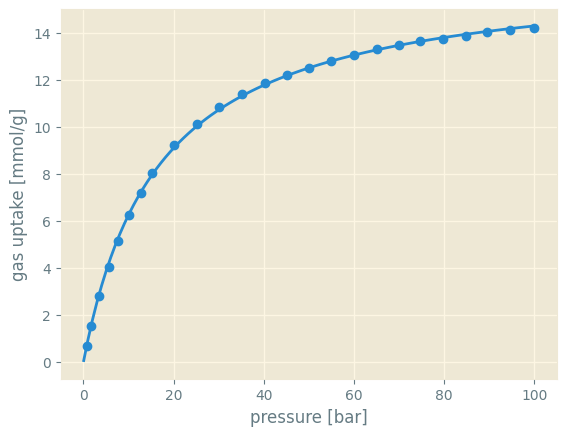

PyObject Text(28.000000000000007, 0.5, 'gas uptake [mmol/g]')

In [8]:
figure()
p = range(0.0, 100.0, length=100)
scatter(df[:, Symbol("P(bar)")], df[:, :N_mmol_g])
plot(p, params["M"] * params["K"] * p ./ (1 .+ params["K"] * p))
xlabel("pressure [bar]")
ylabel("gas uptake [mmol/g]")